In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib

df = pd.read_csv("credit_card_fraud_200k.csv")

df['Device_Type'] = LabelEncoder().fit_transform(df['Device_Type'])

feature_weights = {
    'Time': 1.0,
    'Amount': 4.0,
    'Distance_From_Last_Transaction': 4.0,
    'Avg_Transaction_Value': 2.5,
    'Num_Transactions_Past_24H': 1.5,
    'Device_Type': 0.8,
    'Is_International': 1.5,
    'Merchant_Risk_Score': 2.5,
    'Previous_Fraudulent_Transactions': 1.0
}

X = df.drop('Fraud', axis=1)
y = df['Fraud']

X_weighted = X.copy()
for feature, weight in feature_weights.items():
    if feature != 'Merchant_Risk_Score':
        X_weighted[feature] *= weight

X_train, X_test, y_train, y_test = train_test_split(
    X_weighted, y, test_size=0.1, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

joblib.dump(xgb_model, "xgb_fraud_model_weighted.joblib")



c:\Users\arjun\OneDrive\Documents\CreditCardF\.conda\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.86095
Confusion Matrix:
 [[16329   671]
 [ 2110   890]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     17000
           1       0.57      0.30      0.39      3000

    accuracy                           0.86     20000
   macro avg       0.73      0.63      0.66     20000
weighted avg       0.84      0.86      0.84     20000



['xgb_fraud_model_weighted.joblib']

C:\Users\arjun\AppData\Local\Temp\ipykernel_11504\4124826629.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
C:\Users\arjun\AppData\Local\Temp\ipykernel_11504\4124826629.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\arjun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


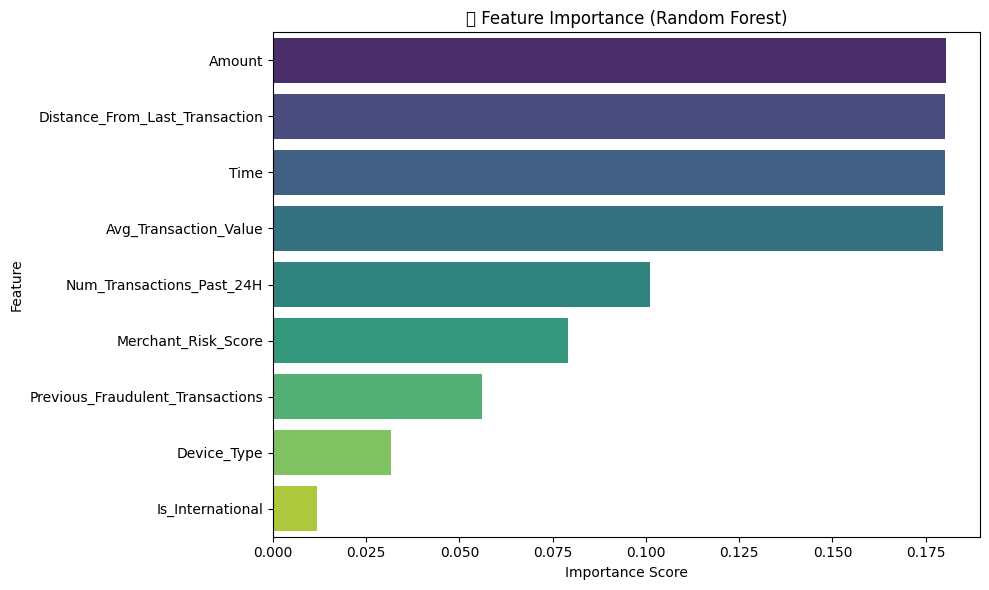

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rf_model is already trained and X is your input DataFrame
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('🔍 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
